In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = 'D:\JupyterNotebook\CSRNet-pytorch-master\ShanghaiTech'

In [14]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A\\train_data','images')
part_A_test = os.path.join(root,'part_A\\test_data','images')
part_B_train = os.path.join(root,'part_B\\train_data','images')
part_B_test = os.path.join(root,'part_B\\test_data','images')
path_sets = [part_A_test]

In [15]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = CSRNet()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
#model = model.cuda()
model = model.to(device)

In [10]:
#loading the trained weights
checkpoint = torch.load(os.path.join(root,'part_A/0model_best.pth.tar'), map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

Check the MAE (Mean Absolute Error) on test images to evaluate our model

In [20]:
mae = 0
for i in range(len(img_paths)):
    img = transform(Image.open(img_paths[i]).convert('RGB')).to(device)
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth_h5'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

KeyboardInterrupt: 

In [13]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i,mae)
print(mae/len(img_paths))

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i,mae)? (<ipython-input-13-f0f2b75ebb1e>, line 14)

Predicted Count :  1240


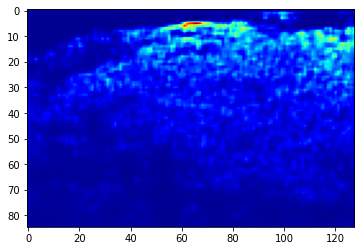

Original Count :  1106


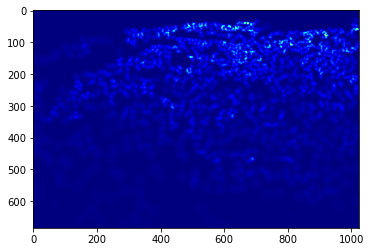

Original Image


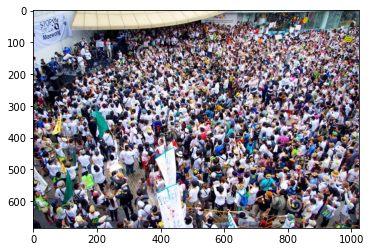

In [24]:
from matplotlib import cm as c
img = transform(Image.open(os.path.join(root, 'part_A/test_data/images/IMG_2.jpg')).convert('RGB')).to(device)

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File(os.path.join(root,'part_A/test_data/ground_truth_h5/IMG_2.h5'), 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread(os.path.join(root,'part_A/test_data/images/IMG_2.jpg')))
plt.show()